# Machine Learning LAB 2: SUPPORT VECTOR MACHINES
Course 2022/23: P. Zanuttigh, M. Mel, F. Barbato

The notebook contains some simple tasks to be performed with **SUPPORT VECTOR MACHINES (SVM)**. <br>
Complete all the **required code sections** and **answer to all the questions**. <br>

### IMPORTANT for the evaluation score:
1. **Read carefully all cells** and **follow the instructions**
2. **Re-run all the code from the beginning** to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebooks.
3. Make sure to fill the code in the appropriate places **without modifying the template**, otherwise you risk breaking later cells.
4. Please **submit the jupyter notebook file (.ipynb)**, do not submit python scripts (.py) or plain text files. **Make sure that it runs fine with the restat&run all command**.
5. **Answer the questions in the appropriate cells**, not in the ones where the question is presented.

# Weather Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for weather classification. We will use a dataset collected using the Luxottica iSee glasses, similarly to the previous laboratory.
The dataset corresponds to 8 hours of atmospherical data recordings sampled every 3 seconds.

The dataset labels are the following:

| ID | Label |
| :-: | :-: |
| 0 | Sunny |
| 1 | Rain |
| 2 | Cloudy |
| 3 | Mostly Clear|

Place your **name** and **ID number** (matricola) in the cell below. <br>
Also recall to **save the file as Surname_Name_LAB2.ipynb**, failure to do so will incur in a **lower grade**.
<br>

**Student name**: Giuseppe Viterbo<br>
**ID Number**: 2086516

In [1]:
#load the required packages
%matplotlib inline

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load the dataset
def load_dataset(path):
    with np.load(path) as data:
        x, y = data["x"], data["y"]
        
        # normalize data
        x -= x.mean(axis=0)
        x /= x.std(axis=0)
        
    return x, y

## A) Hyper-parameter search

**TO DO (A.0):** **Set** the random **seed** using your **ID**. If you need to change it for testing add a constant explicitly, eg.: 1234567 + 1

In [3]:
# fix your ID ("numero di matricola") and the seed for random generator
# as usual you can try different seeds by adding a constant to the number:
# ID = 1234567 + X
ID = 2086516
np.random.seed(ID)

Before proceding to the training steps, we **load the dataset and split it** in training and test set (while the **training** set is **typically larger**, here we set the number of training samples to 1000 and 4000 for the test data).
The **split** is **performed after applying a random permutation** to the dataset, such permutation will **depend on the seed** you set above.<br><br>
**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

In [4]:
X, y = load_dataset("data/lux.npz")
print(X.shape, y.shape)
print (type(X))

(15099, 3) (15099,)
<class 'numpy.ndarray'>


In [5]:
# The task is quite easy, let's add noise to make it more challenging!
# You can try without noise (comment the next 2 lines, easy task), with the suggested amount of noise,
# or play with the suggested amount of noise 

noise = np.random.normal(0,0.1,X.shape)
X=X+noise

**TO DO (A.1):** **Divide** the **data into training and test set** (for this part use 1000 samples in the **first** set, 4000 in the **second** one). Make sure that each label is present at least 10 times in training. If it is not, then keep adding permutations to the initial data until this happens. <br>


In [6]:
#random permute the data and split into training and test taking the first 1000
#data samples as training and 4000 samples as test
permutation =  np.random.permutation(len(y))# ADD YOUR CODE HERE

X = X[permutation] # ADD YOUR CODE HERE
y = y[permutation] # ADD YOUR CODE HERE

m_training = 1000
m_test = 4000

X_train = X[:m_training, :] # ADD YOUR CODE HERE
X_test = X[m_training:m_training+m_test, :]# ADD YOUR CODE HERE
y_train = y[:m_training]# ADD YOUR CODE HERE 
y_test = y[m_training:m_training+m_test]# ADD YOUR CODE HERE

print("X_train shape:", X_train.shape,"X_test shape:", X_test.shape,"||","y_train shape:",  y_train.shape,"y_test shape:", y_test.shape)

labels, freqs = np.unique(y_train, return_counts=True) # ADD YOUR CODE HERE. Hint: use np.unique()
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

X_train shape: (1000, 3) X_test shape: (4000, 3) || y_train shape: (1000,) y_test shape: (4000,)
Labels in training dataset:  [0. 1. 2. 3.]
Frequencies in training dataset:  [419 151 375  55]


In [7]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    cmap = plt.cm.get_cmap('Accent', 4)
    im = ax.scatter(X_matrix[:,0], X_matrix[:,1], X_matrix[:,2], c=labels, cmap=cmap)
    im.set_clim(-0.5, 3.5)
    cbar=fig.colorbar(im, ticks=[0,1,2,3], orientation='vertical', cmap=cmap)
    cbar.ax.set_yticklabels(['Sunny', 'Rainy','Cloudy', 'Mostly clear']) 
    

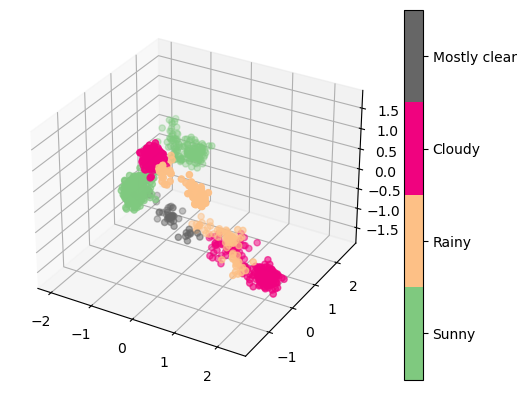

In [8]:
#let's try the plotting function
plot_input(X_train,y_train)

**TO DO (A.2):** Use a SVM classfier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel.

In [9]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [ 0.01, 0.1, 1, 10]}

#train linear SVM
svc = SVC(kernel = 'linear')
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)

# ADD YOUR CODE

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:", clf.best_params_,'\n')
# ADD YOUR CODE

print("Score with best parameters:", clf.best_score_,'\n')
# ADD YOUR CODE

print("All scores on the grid:")
# ADD YOUR CODE
#print(clf.cv_results_.keys())
mean_test_score = clf.cv_results_['mean_test_score']
print(mean_test_score)

RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 10} 

Score with best parameters: 0.91 

All scores on the grid:
[0.788 0.841 0.903 0.91 ]


**TO DO (A.3):** Pick a model for the Polynomial kernel with degree=2.

In [10]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel

# ADD YOUR CODE
degree = 2
svc = SVC(kernel = 'poly', degree = degree)
clf_poly2 = GridSearchCV(svc, parameters, cv=4)

clf_poly2.fit(X_train, y_train)


print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:", clf_poly2.best_params_,'\n')
# ADD YOUR CODE

print("Score with best parameters:", clf_poly2.best_score_,'\n')
# ADD YOUR CODE

print("\nAll scores on the grid:", clf_poly2.cv_results_['mean_test_score'], '\n')
# ADD YOUR CODE

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 1, 'gamma': 1.0} 

Score with best parameters: 0.946 


All scores on the grid: [0.419 0.419 0.849 0.419 0.787 0.939 0.419 0.849 0.946] 



**TO DO (A.4):** Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [11]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1, 1]}

#run SVM with poly of higher degree kernel
degree = 3

# ADD YOUR CODE
svc = SVC(kernel = 'poly', degree = degree)
clf_poly3 = GridSearchCV(svc, parameters, cv=4)

clf_poly3.fit(X_train, y_train)


print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:", clf_poly3.best_params_,'\n')
# ADD YOUR CODE

print("Score with best parameters:", clf_poly3.best_score_,'\n')
# ADD YOUR CODE

print("\nAll scores on the grid:", clf_poly3.cv_results_['mean_test_score'], '\n')
# ADD YOUR CODE

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found: {'C': 1, 'gamma': 1} 

Score with best parameters: 0.9319999999999999 


All scores on the grid: [0.419 0.419 0.861 0.419 0.538 0.901 0.419 0.796 0.932] 



**TO DO (A.5):** Pick a model for the Radial Basis Function kernel:

In [12]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

# ADD YOUR CODE
svc = SVC(kernel = 'rbf')
clf_rbf = GridSearchCV(svc, parameters, cv = 4)

clf_rbf.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:", clf_rbf.best_params_,'\n')
# ADD YOUR CODE

print("Score with best parameters:", clf_rbf.best_score_,'\n')
# ADD YOUR CODE

print("\nAll scores on the grid:", clf_rbf.cv_results_['mean_test_score'], '\n')
# ADD YOUR CODE

RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 100, 'gamma': 1} 

Score with best parameters: 0.993 


All scores on the grid: [0.419 0.599 0.844 0.956 0.597 0.793 0.953 0.988 0.793 0.897 0.985 0.992
 0.884 0.973 0.991 0.993] 



**TO DO (A.Q1) [Answer the following]** <br> 
What do you observe when using RBF and polynomial kernels on this dataset ?

<div class="alert alert-block alert-info">
    **ANSWER A.Q1**:<br>
The result obtained by the RBF kernel is the best one. From the polymomial kernels seems that the second order one is the best one, while the score of linear and third order polynomial kernel are lower
    </div>

**TO DO (A.6):** Report here the best SVM kernel and parameters

In [13]:
#get training and test error for the best SVM model from CV
best_SVM = clf_rbf # USE YOUR OPTIMAL PARAMETERS

# ADD YOUR CODE
# (error is 1 - svm.score)
training_error = 1 - best_SVM.score(X_train, y_train)# ADD YOUR CODE
test_error = 1 - best_SVM.score(X_test,y_test) # ADD YOUR CODE
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.004000
Best SVM test error: 0.010750


**TO DO (A.7):** Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


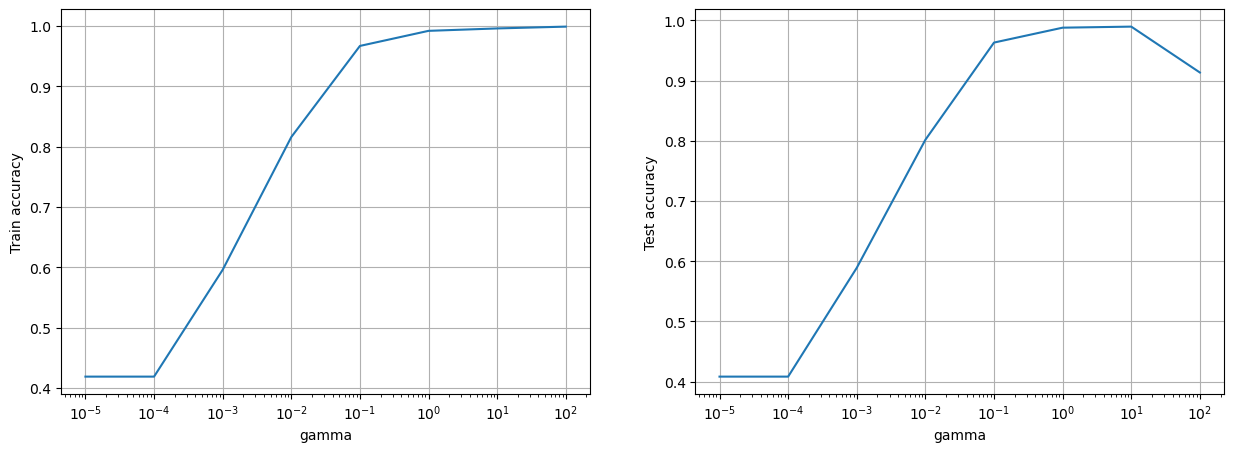

In [14]:
#Test with different values of gamma

gamma_values = np.logspace(-5,2,8)
print(gamma_values)
# use rbf kernel and C=1
train_acc_list, test_acc_list = [], []


# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

for i in gamma_values:
    parameters = {'C': [1],'gamma':[i]}
    svc = SVC(kernel = 'rbf')
    clf_rbf = GridSearchCV(svc, parameters, cv = 4)
    clf_rbf.fit(X_train, y_train)

    train_acc_list.append(clf_rbf.score(X_train, y_train))
    test_acc_list.append(clf_rbf.score(X_test, y_test))
    
    
    

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## B) More data
Now let's do the same but using more data points for training.

**TO DO (B.0):** Choose a higher number of data points (e.g. x = 10000) for training data depending on your computing capability.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 10000# ADD YOUR CODE: adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)# ADD YOUR CODE
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

# initialize support variables for boundaries visualization
granularity = 25
x_max = np.abs(X).max()
x_range = np.linspace(-x_max, x_max, granularity)
x_grid = np.stack(np.meshgrid(x_range, x_range, x_range)).reshape(3, -1).T

Labels in training dataset:  [0. 1. 2. 3.]
Frequencies in training dataset:  [4090 1715 3598  597]


**TO DO (B.1):** Let's try to use SVM with parameters obtained from the best model for $m_{training} =  10000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO (C.Q1) cell below.

In [16]:
#get training and test error for the best SVM model from CV

# ADD YOUR CODE
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}
svc = SVC(kernel = 'rbf')
clf_rbf = GridSearchCV(svc, parameters, cv = 4)

clf_rbf.fit(X_train, y_train)


print ('RESULTS FOR rbf KERNEL')
print("Best parameters set found:", clf_rbf.best_params_,'\n')
print("Score with best parameters:", clf_rbf.best_score_,'\n')
print("All scores on the grid:", clf_rbf.cv_results_['mean_test_score'], '\n')

best_SVM = clf_rbf
training_error = 1 - best_SVM.score(X_train, y_train)# ADD YOUR CODE
test_error = 1 - best_SVM.score(X_test,y_test) # ADD YOUR CODE

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 1, 'gamma': 1} 

Score with best parameters: 0.99 

All scores on the grid: [0.5876 0.7694 0.9484 0.9863 0.7686 0.8904 0.9838 0.99   0.8849 0.969
 0.9868 0.9899 0.9012 0.9843 0.9878 0.99  ] 

Best SVM training error: 0.009500
Best SVM test error: 0.013140


**TO DO (B.2):** Just for comparison, let's also use logistic regression (without regularization, i.e. with C very large).

In [17]:
from sklearn import linear_model

# ADD YOUR CODE
from sklearn import metrics

logreg = linear_model.LogisticRegression( C = 1e10)
logreg.fit(X_train, y_train)

training_error = 1 - metrics.accuracy_score(y_train, logreg.predict(X_train))
test_error = 1 - metrics.accuracy_score(y_test, logreg.predict(X_test))

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.112300
Best logistic regression test error: 0.105119


**TO DO (B.3):** Try logistic regression with regularization (use C=1)

In [18]:
# ADD YOUR CODE
logreg2 = linear_model.LogisticRegression( C = 1)
logreg2.fit(X_train, y_train)

training_error = 1 - metrics.accuracy_score(y_train, logreg2.predict(X_train))
test_error = 1 - metrics.accuracy_score(y_test, logreg2.predict(X_test))


print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.112500
Best regularized logistic regression test error: 0.104530


# C) Boundaries Visualization

Now let us compare the shape of classification boundaries. 


**TO DO (C.0):** Use the SVM, logistic regression (with and without regularization) to predict on the test set X_test. 

In [19]:
rbf_SVM_test = clf_rbf.predict(X_test)# ADD YOUR CODE
lr_test = logreg.predict(X_test) # ADD YOUR CODE 
regL2_test = logreg2.predict(X_test) # ADD YOUR CODE


We constructed a grid of all possible combinations of input values, we now use it to extract the classification boundaries of the three classifiers by having them predict on each input.

(-2.7762888142185282, 2.7762888142185282)

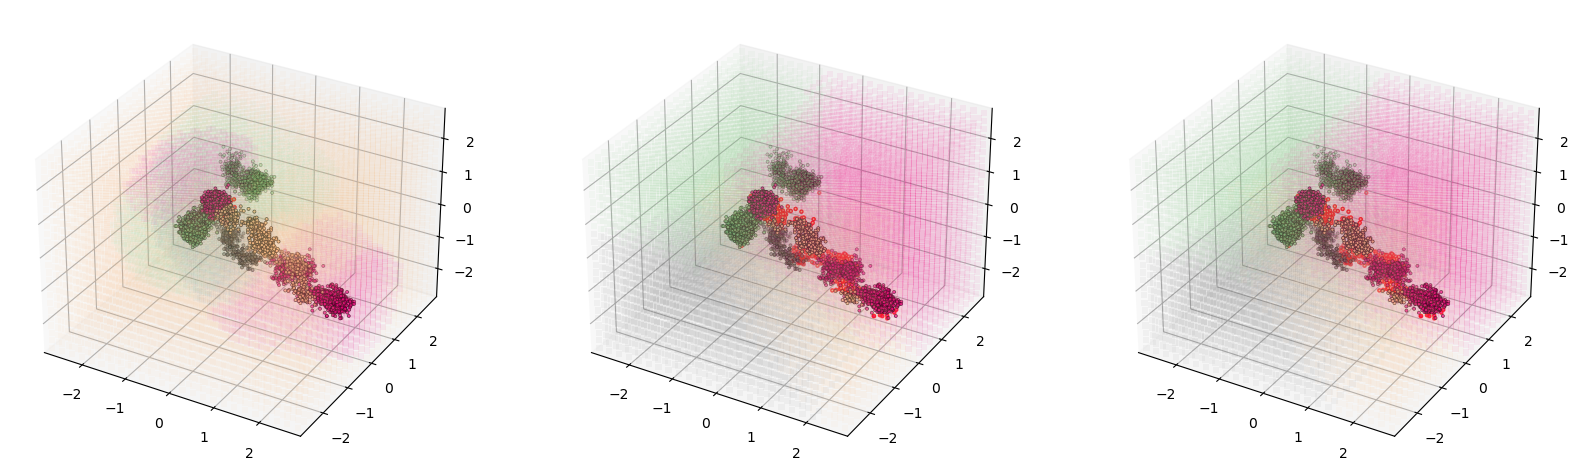

In [20]:
rbf_SVM = clf_rbf
lr = logreg
regL2 = logreg2


rbf_SVM_grid = rbf_SVM.predict(x_grid)
lr_grid = lr.predict(x_grid)
regL2_grid = regL2.predict(x_grid)


rbf_SVM_m = y_test == rbf_SVM_test
lr_m = y_test == lr_test
regL2_m = y_test == lr_test

fig = plt.figure(figsize=(20,36))
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax3 = fig.add_subplot(1, 3, 3, projection="3d")

ax1.scatter(x_grid[:,0], x_grid[:,1], x_grid[:,2], c=rbf_SVM_grid, linewidth=0, marker="s", alpha=.05,cmap='Accent')
ax2.scatter(x_grid[:,0], x_grid[:,1], x_grid[:,2], c=lr_grid, linewidth=0, marker="s", alpha=.05,cmap='Accent')
ax3.scatter(x_grid[:,0], x_grid[:,1], x_grid[:,2], c=regL2_grid, linewidth=0, marker="s", alpha=.05,cmap='Accent')

ax1.scatter(X_test[rbf_SVM_m,0], X_test[rbf_SVM_m,1], X_test[rbf_SVM_m,2], c=y_test[rbf_SVM_m], linewidth=.5, edgecolor="k", marker=".",cmap='Accent')
ax1.scatter(X_test[~rbf_SVM_m,0], X_test[~rbf_SVM_m,1], X_test[~rbf_SVM_m,2], c=y_test[~rbf_SVM_m], linewidth=1, edgecolor="r", marker=".",cmap='Accent')
ax1.set_xlim([-x_max, x_max])
ax1.set_ylim([-x_max, x_max])
ax1.set_zlim([-x_max, x_max])

ax2.scatter(X_test[lr_m,0], X_test[lr_m,1], X_test[lr_m,2], c=y_test[lr_m], linewidth=.5, edgecolor="k", marker=".",cmap='Accent')
ax2.scatter(X_test[~lr_m,0], X_test[~lr_m,1], X_test[~lr_m,2], c=y_test[~lr_m], linewidth=1, edgecolor="r", marker=".",cmap='Accent')
ax2.set_xlim([-x_max, x_max])
ax2.set_ylim([-x_max, x_max])
ax2.set_zlim([-x_max, x_max])

ax3.scatter(X_test[regL2_m,0], X_test[regL2_m,1], X_test[regL2_m,2], c=y_test[regL2_m], linewidth=.5, edgecolor="k", marker=".",cmap='Accent')
ax3.scatter(X_test[~regL2_m,0], X_test[~regL2_m,1], X_test[~regL2_m,2], c=y_test[~regL2_m], linewidth=1, edgecolor="r", marker=".",cmap='Accent')
ax3.set_xlim([-x_max, x_max])
ax3.set_ylim([-x_max, x_max])
ax3.set_zlim([-x_max, x_max])

**TO DO (C.Q1) [Answer the following]** <br> 
Compare and discuss:
- the results from SVM with m=600 and with m=10000 (or whatever value you set) training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

<div class="alert alert-block alert-info">
**ANSWER C.Q1**:<br>
   1. As expected the score with the best parameters, the traing and test errors decrese as the number of training 
    objects increases.
   2.  the SVM errors seems to be at leat one order of magnitude smaller than the one obtained from the Logistic Regression method. 
    </div>

**TO DO (C.1):** Change the code below to highlight the samples classified correctly by SVM and wrongly by logistic regression.

(-2.7762888142185282, 2.7762888142185282)

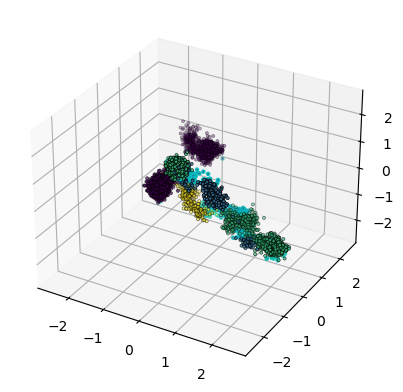

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

mask = (y_test == clf_rbf.predict(X_test)) & ((y_test != logreg.predict(X_test)))  # ADD YOUR CODE

ax.scatter(X_test[mask,0], X_test[mask,1], X_test[mask,2], c=y_test[mask], linewidth=1, edgecolor="c", marker=".")
ax.scatter(X_test[~mask,0], X_test[~mask,1], X_test[~mask,2], c=y_test[~mask], linewidth=.5, edgecolor="k", marker=".")
ax.set_xlim([-x_max, x_max])
ax.set_ylim([-x_max, x_max])
ax.set_zlim([-x_max, x_max])

**TO DO (C.2):** Plot the confusion matrix for the SVM classifier and for logistic regression. The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label. Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors. You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation). You can also print also the normalized confusion matrix.


In [22]:
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM =  confusion_matrix(y_test, rbf_SVM.predict(X_test)) # ADD YOUR CODE
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = confusion_matrix(y_test, lr.predict(X_test)) # ADD YOUR CODE
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [2028  813 1925  333]

 Confusion matrix SVM  
 
 [[2028    0    0    0]
 [   0  767   45    1]
 [   0   18 1907    0]
 [   0    3    0  330]]

 Confusion matrix SVM (normalized)   
 
 [[1.   0.   0.   0.  ]
 [0.   0.94 0.06 0.  ]
 [0.   0.01 0.99 0.  ]
 [0.   0.01 0.   0.99]]

 Confusion matrix LR  
 
 [[2026    0    1    1]
 [   0  342  441   30]
 [   1   18 1904    2]
 [   5    0   37  291]]

 Confusion matrix LR (normalized)   
 
 [[1.   0.   0.   0.  ]
 [0.   0.42 0.54 0.04]
 [0.   0.01 0.99 0.  ]
 [0.02 0.   0.11 0.87]]


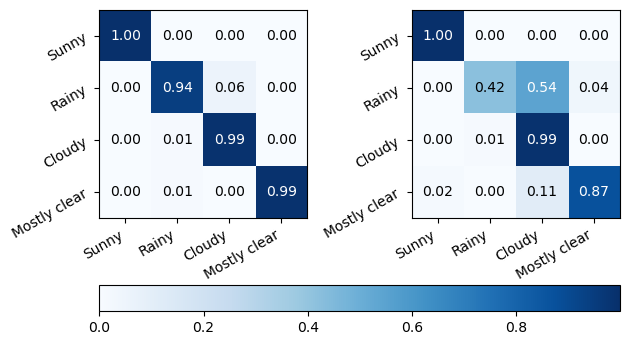

In [23]:
fig, axs = plt.subplots(1, 2)

for idx, conf in enumerate([confusion_SVM, confusion_LR]):
    
    im = axs[idx].imshow(conf /counts[:,None], cmap="Blues",interpolation='nearest')
    axs[idx].set_xticks([0,1,2,3])
    axs[idx].set_yticks([0,1,2,3])
    axs[idx].set_xticklabels(['Sunny', 'Rainy','Cloudy', 'Mostly clear'],ha="right",rotation=30) 
    axs[idx].set_yticklabels(['Sunny', 'Rainy','Cloudy', 'Mostly clear'],ha="right",rotation=30) 
    cm = conf /counts[:,None]
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axs[idx].text(j, i, format(cm[i, j], fmt),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
fig.colorbar(im, ax=axs[:], location='bottom')  
plt.show()

**TO DO (C.Q2) [Answer the following]** <br> 
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


<div class="alert alert-block alert-info">
    **ANSWER C.Q2**:<br>
From the confusion matrices it is clearly visible that the some classes have higher accuracy than others, like sunny and cloudy (indipendetly from the method used to classify it), this could be due to the fact that, for example, the 'feature' sunny it's well 'spaced' from the others (the intuition is that 'it's easier to distinguish from sunny to rainy than to distinguish rainy from cloudly). Similar intuitive argument could be done for all the combination. There is also a clear misclassification in the logistic regression mathod, in particular to the true true class rainy, (which is classified both rainy and cloudly). This is not present in such a strong way in the SVM classification. Some of this problems are also linked to the fact that the rainy data are the second least frequent one. Varing the noise shows that also mostly clear feature (the least frequent one) is also not well labaled by the logreg.
    </div>
  